Dataset Link: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\jsieg\OneDrive\Desktop\python scipts\Data Science Project\AAPL.csv" # you may need to replace this path with your own
data = pd.read_csv(path)

###
Data Processing
###

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [4]:
print("Initial data preview:")
print(data.head())

#Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

#Remove duplicates (if any)
data = data.drop_duplicates()

#Convert 'Date' column to datetime if it's not already
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Adj Close'] > 0) & (data['Adj Close'] < 1000)]

#Recheck the data after cleaning
print("\nCleaned data preview:")
print(data.head())

#Summary of the cleaned dataset
print(data.isnull().sum())

Initial data preview:
         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.407747  117258400.0
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.386473   43971200.0
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.358108   26432000.0
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366972   21610400.0
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.377609   18362400.0

Missing values in each column:
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Cleaned data preview:
        Date      Open      High       Low     Close  Adj Close       Volume
0 1980-12-12  0.513393  0.515625  0.513393  0.513393   0.407747  117258400.0
1 1980-12-15  0.488839  0.488839  0.486607  0.486607   0.386473   43971200.0
2 1980-12-16  0.453125  0.453125  0.450893  0.450893   0.358108   26432000.0
3 1980-12-17  0.462054  0.464

Apple Stock Summary Statistics

In [5]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,9822,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9.822000e+03
mean,2000-05-28 06:28:48.527794688,30.350057,30.640633,30.048298,30.352940,28.364033,8.620720e+07
min,1980-12-12 00:00:00,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1990-08-30 06:00:00,1.062500,1.085357,1.043571,1.066964,0.914089,3.318138e+07
50%,2000-05-18 12:00:00,1.709286,1.742366,1.671429,1.712857,1.452872,5.798940e+07
75%,2010-02-24 18:00:00,30.393928,30.555714,29.865358,30.233214,26.305946,1.076320e+08
max,2019-11-25 00:00:00,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09
std,NaN,53.443016,53.908364,52.983661,53.464270,51.603590,8.623138e+07


### Apple Stock Summary Statistics (1980-2021)

The table provides summary statistics for Apple's stock data from 1980 to 2021. Here's what each row and column represents:

#### Columns:
- **Date**: Represents the trading date.
- **Open**: The price at which Apple's stock opened on a given trading day.
- **High**: The highest price Apple's stock reached during the trading day.
- **Low**: The lowest price Apple's stock reached during the trading day.
- **Close**: The price at which Apple's stock closed at the end of the trading day.
- **Adj Close**: The adjusted closing price, accounting for factors like stock splits or dividends, giving a more accurate historical perspective.
- **Volume**: The number of shares traded on a given day.

#### Rows:
- **count**: The total number of entries or records in the dataset for each column. For instance, there are 9,822 records for stock prices and volume, but the count for "Date" is one higher due to a formatting issue, which is negligible.
  
- **mean**: The average value of each column over the dataset's time span.
   - The average opening price is **$30.35**, and the average adjusted closing price (after adjustments like stock splits) is **$28.36**.
   - The average trading volume per day is approximately **86.2 million shares**.

- **min**: The minimum value observed in the dataset.
   - The earliest date is **1980-12-12**.
   - The lowest adjusted close price is **$0.16** per share, reflecting Apple's stock price in the early years of the company.
   - The lowest volume was **347,200 shares** traded in a single day.

- **25% (25th percentile)**: The value below which 25% of the data falls.
   - 25% of the opening prices were below **$1.06**, which reflects Apple's lower early stock prices before the company grew.
   - Similarly, 25% of trading volumes were below **33.18 million shares**.

- **50% (median)**: The middle value, where 50% of the data is above and 50% is below.
   - The median opening price is **$1.71**, meaning the stock price was at or below this for half of the trading days.
   - The median trading volume is **57.99 million shares**.

- **75% (75th percentile)**: The value below which 75% of the data falls.
   - 75% of the stock's opening prices were below **$30.39**, and 75% of the adjusted close prices were below **$26.31**.
   - 75% of trading volumes were below **107.63 million shares**.

- **max**: The highest value in the dataset.
   - The latest date in the dataset is **2019-11-25**.
   - The highest stock price recorded was **$267.90** (closing price was **$267.10**), reflecting Apple’s substantial growth.
   - The highest trading volume recorded was **1.85 billion shares** in a single day.

- **std (standard deviation)**: A measure of how much the data varies from the average.
   - The standard deviation for the adjusted close price is **$51.60**, indicating significant fluctuations in Apple's stock price over the years.
   - The volume standard deviation is approximately **86.23 million shares**, which shows considerable variation in daily trading volumes.

### Summary:
This table captures a historical overview of Apple's stock prices and trading activity from 1980 to 2021. The data reflects the company's growth from a modestly traded stock to one with substantial price increases and trading volumes. The variability in stock prices and trading volumes indicates periods of high volatility, influenced by Apple's major product launches and market movements over the years.


In [6]:
# Ensure no missing values in Adjusted Close Price
data = data.dropna(subset=['Adj Close'])

# Initial number of shares
day1share = 25

# Initial share price (assuming adjusted close price at IPO in the dataset)
initial_price = data.iloc[0]['Adj Close']

# Stock split history:
# 1987: 2-for-1 split
# 2000: 2-for-1 split
# 2005: 2-for-1 split
# 2014: 7-for-1 split
# 2020: 4-for-1 split (We will use this even though there's no 2021 data, for a hypothetical)

# Tracking the splits over time
shares1987 = day1share * 2
print('1987 share number', shares1987)
shares2000 = shares1987 * 2
print('2000 share number', shares2000)
shares2005 = shares2000 * 2
print('2005 share number', shares2005)
shares2014 = shares2005 * 7
print('2014 share number', shares2014)
shares2020 = shares2014 * 4
print('2020 share number', shares2020)

# Final number of shares after all splits
finalshares = shares2020

# Get the stock price on the last available date in the dataset (November 2019)
latest_price_2019 = data.loc[data['Date'] == data['Date'].max(), 'Adj Close'].values[0]

# Final investment value based on the latest price in 2019
finalinvestmentvalue = finalshares * latest_price_2019

# Display the results
print("Final number of shares after splits:", finalshares)
print(f"Value of investment using the latest available price in 2019: ${finalinvestmentvalue:,.2f}")

1987 share number 50
2000 share number 100
2005 share number 200
2014 share number 1400
2020 share number 5600
Final number of shares after splits: 5600
Value of investment using the latest available price in 2019: $1,491,671.97


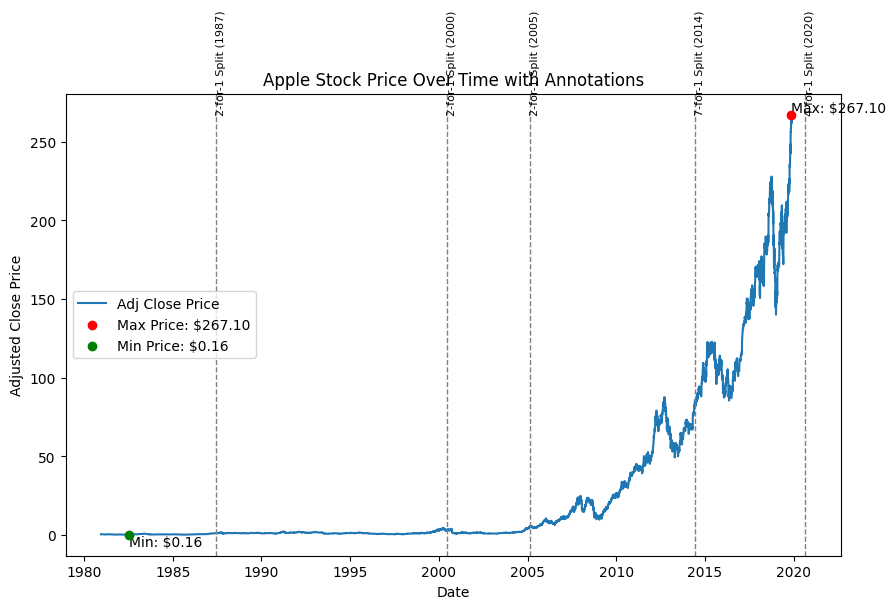

Minimum Adjusted Price: $0.16
Date of Minimum Price: 1982-07-08T00:00:00.000000000
Maximum Adjusted Price: $267.10
Date of Maximum Price: 2019-11-18T00:00:00.000000000


In [7]:
import matplotlib.pyplot as plt

# Find the maximum and minimum adjusted close prices
max_price = data['Adj Close'].max()
min_price = data['Adj Close'].min()

# Find the dates of the max and min prices
max_date = data[data['Adj Close'] == max_price]['Date'].values[0]
min_date = data[data['Adj Close'] == min_price]['Date'].values[0]

# Plotting the stock price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adj Close Price')

# Add title and labels
plt.title("Apple Stock Price Over Time with Annotations")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")

# Adding annotations for stock splits
split_dates = ['1987-06-16', '2000-06-21', '2005-02-28', '2014-06-09', '2020-08-31']
split_labels = ['2-for-1 Split (1987)', '2-for-1 Split (2000)', '2-for-1 Split (2005)', '7-for-1 Split (2014)', '4-for-1 Split (2020)']

for date, label in zip(split_dates, split_labels):
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', lw=1)
    plt.text(pd.to_datetime(date), max_price, label, rotation=90, verticalalignment='bottom', fontsize=8)

# Annotate max price
plt.scatter(max_date, max_price, color='red', label=f'Max Price: ${max_price:.2f}', zorder=5)
plt.text(max_date, max_price, f'Max: ${max_price:.2f}', verticalalignment='bottom', fontsize=10)

# Annotate min price
plt.scatter(min_date, min_price, color='green', label=f'Min Price: ${min_price:.2f}', zorder=5)
plt.text(min_date, min_price, f'Min: ${min_price:.2f}', verticalalignment='top', fontsize=10)

# Show the plot
plt.legend()
plt.show()

# Find the minimum adjusted close price and its corresponding date
min_price = data['Adj Close'].min()
min_date = data[data['Adj Close'] == min_price]['Date'].values[0]

print(f"Minimum Adjusted Price: ${min_price:.2f}")
print(f"Date of Minimum Price: {min_date}")

max_price = data['Adj Close'].max()
max_date = data[data['Adj Close'] == max_price]['Date'].values[0]

print(f"Maximum Adjusted Price: ${max_price:.2f}")
print(f"Date of Maximum Price: {max_date}")


In [8]:
#determine how much we would have at day1 with 25 shares
day1 = 25 * data.iloc[0]['Open']
print('Apple\'s day one stock price falls in the range of $', (25 * data.iloc[0]['Adj Close']), 'to $', 25 * data.iloc[0]['Open'])

Apple's day one stock price falls in the range of $ 10.193675 to $ 12.834825


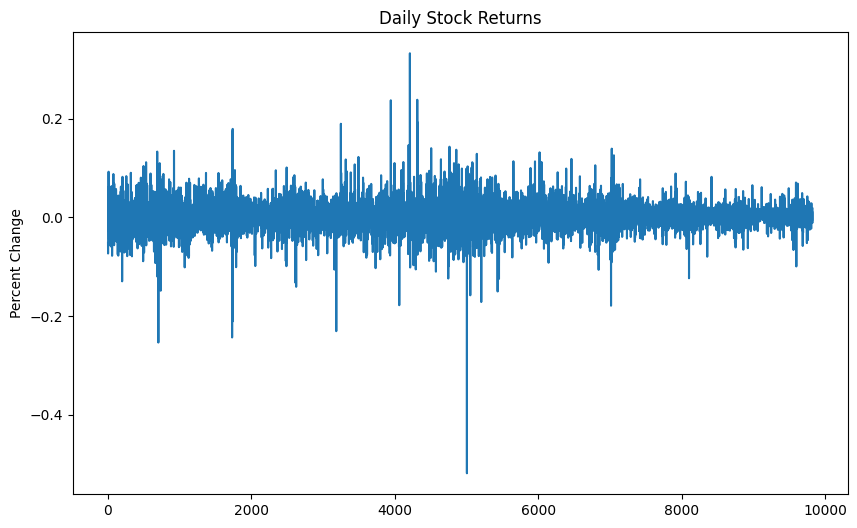

0            NaN
1      -5.217451
2      -7.339452
3       2.475231
4       2.898586
          ...   
9818   -0.303256
9819   -1.164147
9820   -0.448342
9821   -0.087787
9822    1.753379
Name: Daily Return, Length: 9822, dtype: float64
Mean Daily Return: 0.11%
Volatility (Std Dev): 2.87%


In [9]:
data['Daily Return'] = data['Adj Close'].pct_change()
data['Daily Return'].plot(figsize=(10,6))
plt.title('Daily Stock Returns')
plt.ylabel('Percent Change')
plt.show()
#data = data.dropna(subset=['Daily Return'])
data['Daily Return'] = data['Adj Close'].pct_change() * 100
mean_return = data['Daily Return'].mean()
volatility = data['Daily Return'].std()
print(data['Daily Return'])
print(f"Mean Daily Return: {mean_return:.2f}%")
print(f"Volatility (Std Dev): {volatility:.2f}%")



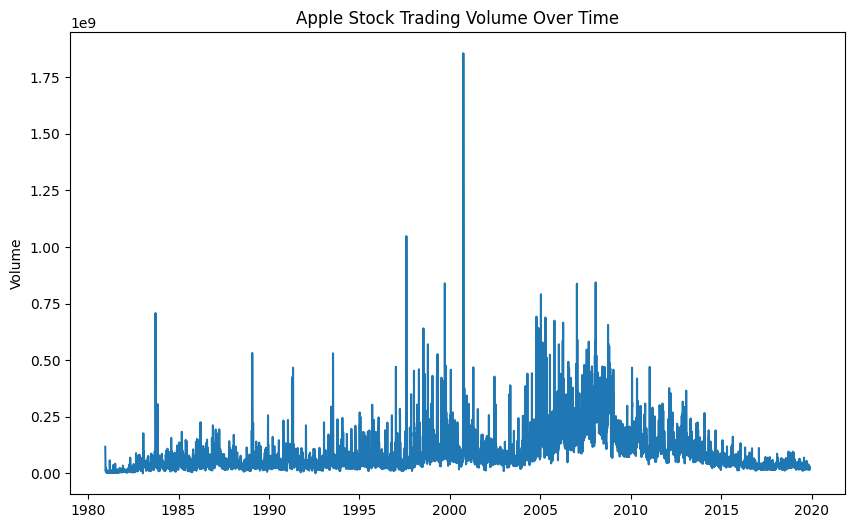

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Volume'])
plt.title('Apple Stock Trading Volume Over Time')
plt.ylabel('Volume')
plt.show()


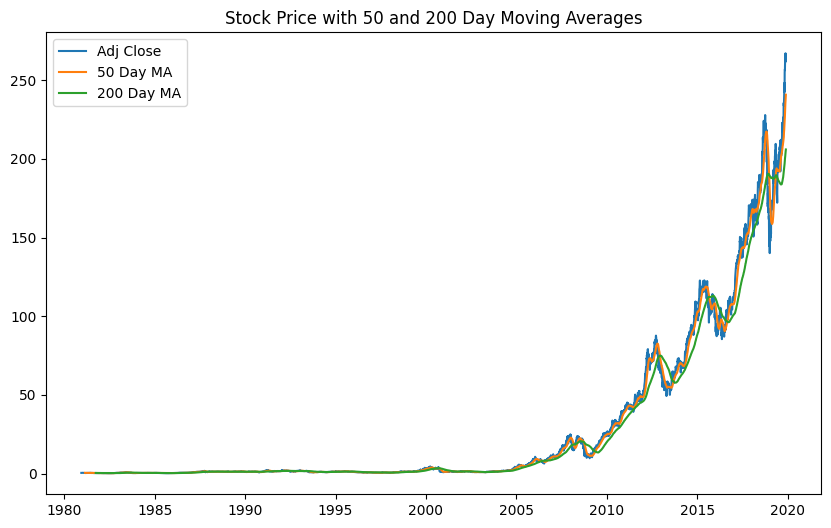

In [11]:
data['50 Day MA'] = data['Adj Close'].rolling(window=50).mean()
data['200 Day MA'] = data['Adj Close'].rolling(window=200).mean()
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.plot(data['Date'], data['50 Day MA'], label='50 Day MA')
plt.plot(data['Date'], data['200 Day MA'], label='200 Day MA')
plt.legend()
plt.title('Stock Price with 50 and 200 Day Moving Averages')
plt.show()


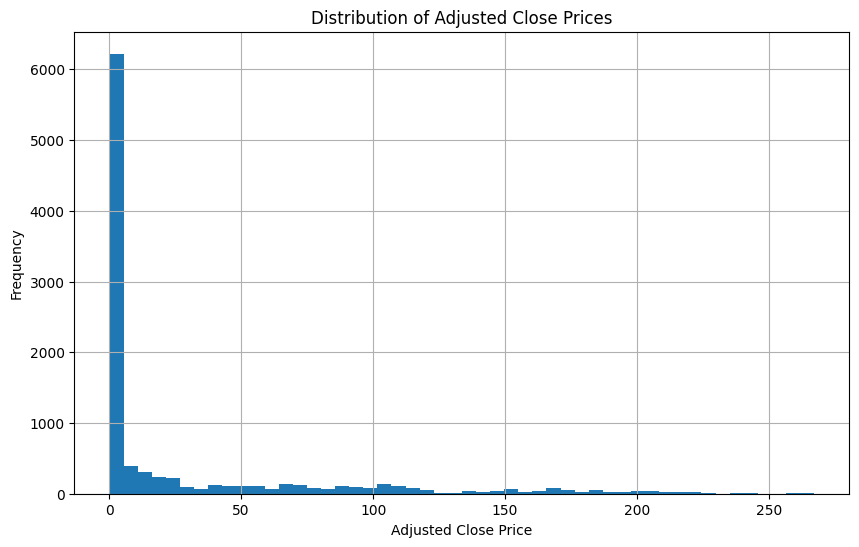

In [12]:
data['Adj Close'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Find the minimum adjusted close price and its corresponding date
min_price = data['Adj Close'].min()
min_date = data[data['Adj Close'] == min_price]['Date'].values[0]

print(f"Minimum Adjusted Price: ${min_price:.2f}")
print(f"Date of Minimum Price: {min_date}")


Minimum Adjusted Price: $0.16
Date of Minimum Price: 1982-07-08T00:00:00.000000000


Model Evaluation Metrics:
                        MAE       MSE
Linear Regression  0.128536  0.102544
Random Forest      0.190390  0.246716


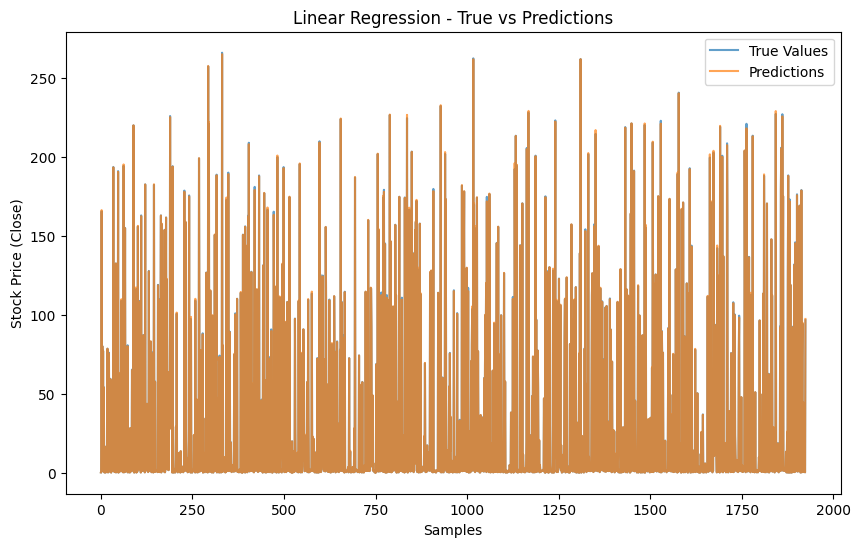

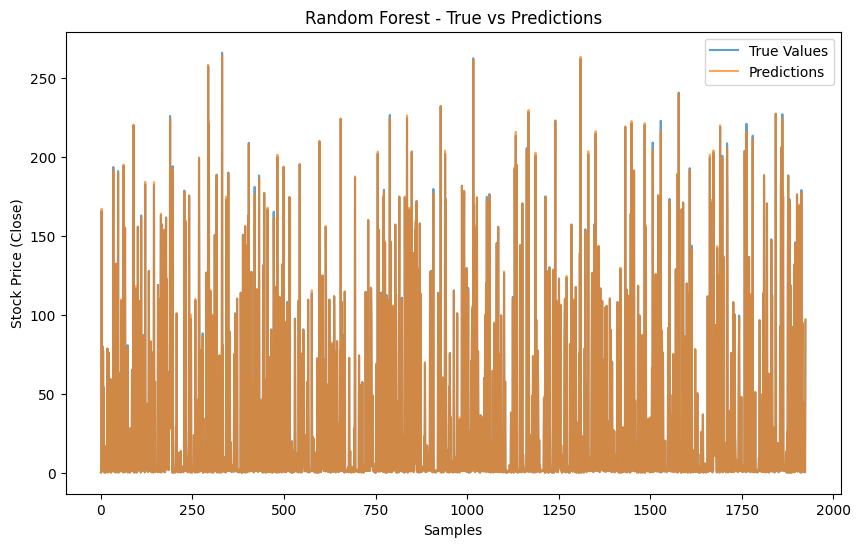

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])
data['Daily Change (%)'] = (data['Close'] - data['Open']) / data['Open'] * 100
data.dropna(inplace=True)

# Select features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:")
print(results_df)

# Visualize the predictions of each model
for name, y_pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='True Values', alpha=0.7)
    plt.plot(y_pred, label='Predictions', alpha=0.7)
    plt.title(f'{name} - True vs Predictions')
    plt.legend()
    plt.xlabel('Samples')
    plt.ylabel('Stock Price (Close)')
    plt.show()

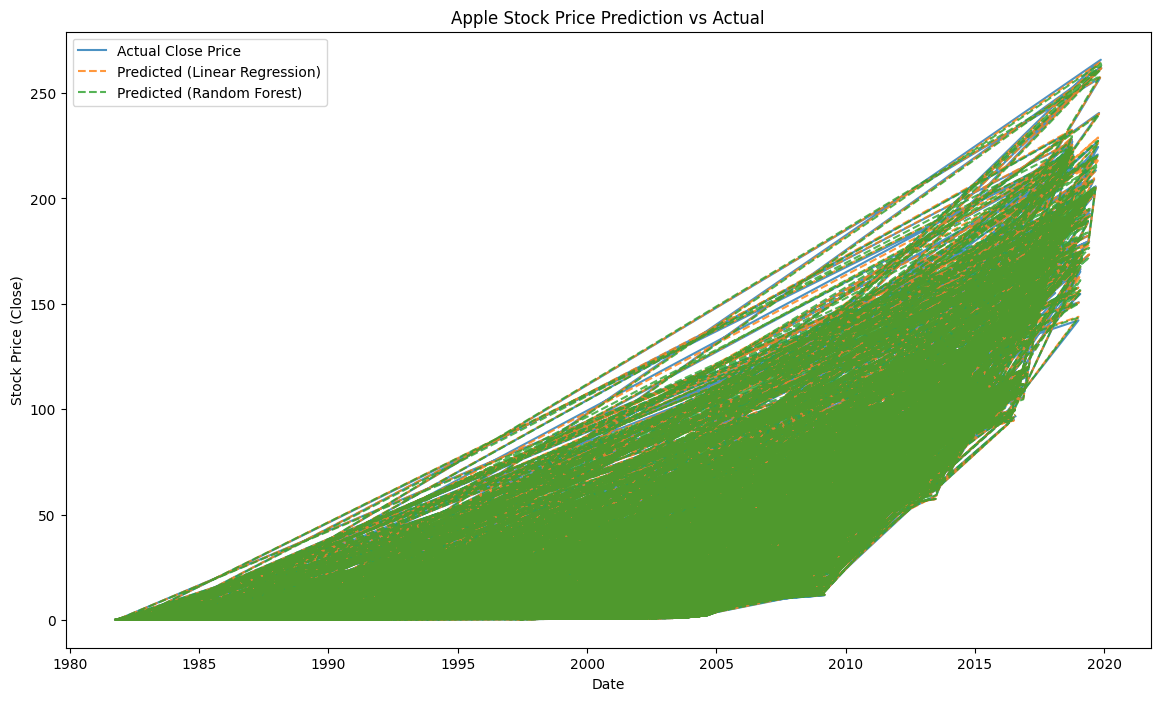

In [11]:
# Fixing alignment issue: Extracting the correct indices for plotting
# Reset the index of the test data
X_test_reset = X_test.reset_index()
y_test_reset = y_test.reset_index(drop=True)

# Create a new DataFrame for visualization
plot_data = pd.DataFrame({
    'Date': data.loc[X_test_reset['index'], 'Date'].reset_index(drop=True),
    'Actual Close': y_test_reset,
    'Predicted Close (Linear Regression)': predictions['Linear Regression'],
    'Predicted Close (Random Forest)': predictions['Random Forest']
})

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14, 8))
plt.plot(plot_data['Date'], plot_data['Actual Close'], label='Actual Close Price', alpha=0.8)
plt.plot(plot_data['Date'], plot_data['Predicted Close (Linear Regression)'], label='Predicted (Linear Regression)', linestyle='--', alpha=0.8)
plt.plot(plot_data['Date'], plot_data['Predicted Close (Random Forest)'], label='Predicted (Random Forest)', linestyle='--', alpha=0.8)
plt.title('Apple Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()


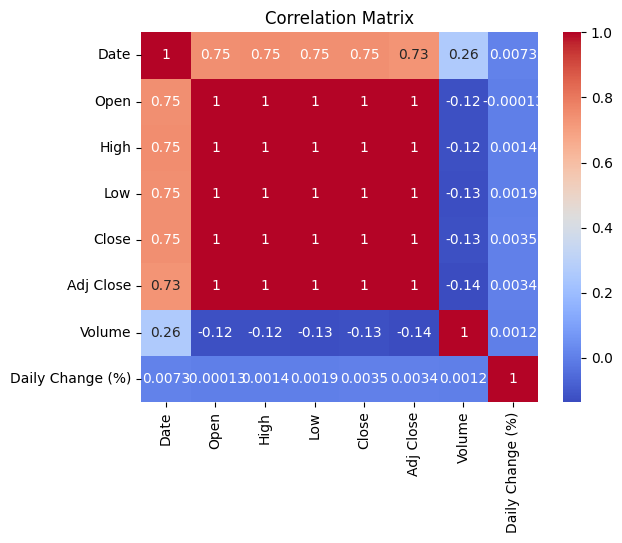

In [11]:
import seaborn as sns
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


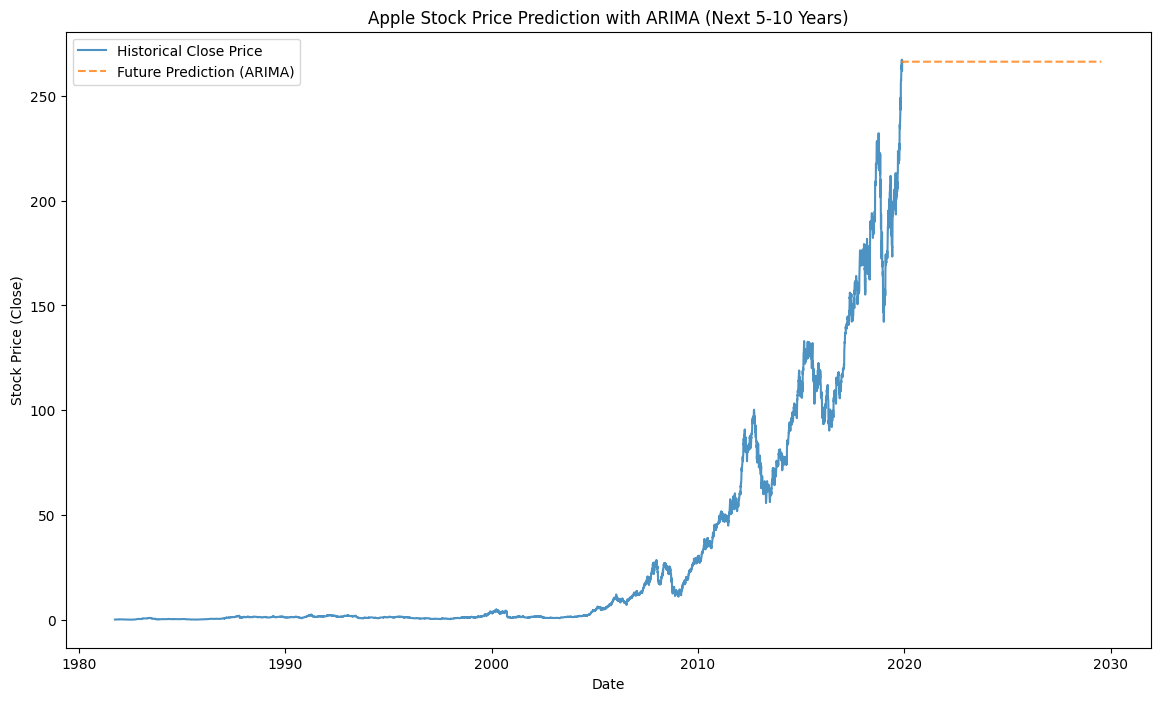

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
arima_data = data['Close']
arima_model = ARIMA(arima_data, order=(5, 1, 0))
arima_result = arima_model.fit()
future_steps = 10 * 252  # 10 years of trading days
arima_forecast = arima_result.forecast(steps=future_steps)

future_arima_dates = pd.date_range(start=data['Date'].max(), periods=future_steps, freq='B')

# Plot historical and forecasted prices
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Close'], label='Historical Close Price', alpha=0.8)
plt.plot(future_arima_dates, arima_forecast, label='Future Prediction (ARIMA)', linestyle='--', alpha=0.8)
plt.title('Apple Stock Price Prediction with ARIMA (Next 5-10 Years)')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()


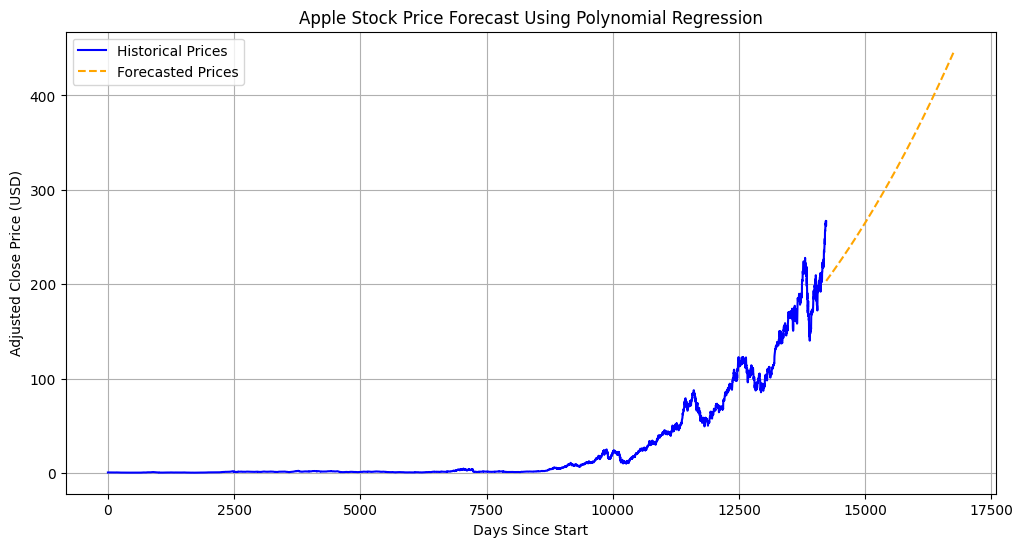

Value of 25 shares in 5 years: $7735.09
Value of 25 shares in 10 years: $11131.95


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the dataset
file_path = r"C:\Users\jsieg\OneDrive\Desktop\python scipts\Data Science Project\AAPL.csv"
apple_data = pd.read_csv(file_path)

# Convert Date to datetime format for easier manipulation
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

# Sort the data by date
apple_data = apple_data.sort_values('Date')

# Use only the Adjusted Close prices for modeling
apple_prices = apple_data[['Date', 'Adj Close']].copy()
apple_prices.set_index('Date', inplace=True)

# Add a column for the number of days since the first observation
apple_prices['Days'] = (apple_prices.index - apple_prices.index[0]).days

# Check for and remove missing values
apple_prices = apple_prices.dropna()

# Prepare data for polynomial regression
X = apple_prices[['Days']].values
y = apple_prices['Adj Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features for non-linear trends
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a linear regression model on the polynomial data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Forecast the stock price 10 years into the future (252 trading days per year)
future_days = np.arange(X[-1][0], X[-1][0] + 10 * 252).reshape(-1, 1)
future_poly = poly.transform(future_days)
forecast_prices = model.predict(future_poly)

# Calculate the predicted price for 5 and 10 years
price_5_years = forecast_prices[252 * 5 - 1]
price_10_years = forecast_prices[252 * 10 - 1]

# Calculate the value of 25 shares
value_5_years = price_5_years * 25
value_10_years = price_10_years * 25

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(apple_prices['Days'], y, label='Historical Prices', color='blue')
plt.plot(future_days, forecast_prices, label='Forecasted Prices', color='orange', linestyle='--')
plt.title('Apple Stock Price Forecast Using Polynomial Regression')
plt.xlabel('Days Since Start')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Print the results
print(f"Value of 25 shares in 5 years: ${value_5_years:.2f}")
print(f"Value of 25 shares in 10 years: ${value_10_years:.2f}")
